In [1]:
import os
os.environ["MKL_NUM_THREADS"]="1"

In [2]:
%load_ext snakeviz

In [3]:
from transmon_chains.TransmonChain import *
from transmon_chains.ChainTwoToneSimulation import *

In [4]:
alphas = array([-0.171*2*np.pi, -0.166*2*np.pi,  -0.165*2*np.pi,  -0.161*2*np.pi, -0.175*2*np.pi])
f_ge_maxs = array([27.24295125, 25.56626214, 26.79981289, 25.92929565, 26.91901604])
ds = [0.71593126, 0.69069682, 0.70522616, 0.71491453, 0.69005626]
periods = array([0.68739897, 0.70228482, 0.63067226, 0.6463941 , 3.68887343])
sweet_spots = array([-0.02430313,  0.02307223,  0.00949314,  0.0420667 ,  0.217])

# f_ge_maxs = array([2.72376083e+01,  2.55725642e+01,  2.67977853e+01,
#         2.59307058e+01,  2.69234490e+01])
J = array([0.25921578, 0.24364566, 0.24164441, 0.25127047, 0.24504424])

all_intersection_exact = array([0.18664914179931644, 0.14669218977050785, 
                                0.1811727224951172, 0.18046699924316406,1.2175708937329102])


Ecs = -alphas
Ejs = (f_ge_maxs + Ecs)**2/8/Ecs

In [5]:
chain = TransmonChain(length = 5,
                      transmon_truncation=3,
                      transmon_diagonalization_dimension=15)

chain.set_Ec(Ecs)
chain.set_Ej(Ejs)
chain.set_asymmetry(ds)
chain.set_J(J)
phi_intersection = (all_intersection_exact - sweet_spots)/periods
chain.set_phi(phi_intersection)
chain.set_gamma_phi(1e-4)
chain.set_gamma_rel([1e-2, 1e-4, 1e-4, 1e-4, 1e-2])
chain.set_Omega([0, 0, 0, 0, 0.02*2*pi])

chain.build_transmons()

Setting all gamma_phi to be equal


In [18]:
# periods = [1, 1e3, 1e3, 1e3, 1e3]
# swss = [0.25, .25e3, .25e3, .25e3, .25e3]
currs = linspace(0.22, .28, 12)
freqs = linspace(3.8, 4, 200)

CTTS = ChainTwoToneSimulation(chain, sweet_spots=sweet_spots, periods=periods,
                              chain_hilbert_space_truncation=5, max_simultaneously_above_first_excited = 1,
                              steady_kwargs = {"use_rcm":True})
Omega_2s = logspace(-3, -1, 24*4)*2*pi
Omegas = [[0,0,0,0,Omega_2] for Omega_2 in Omega_2s]
CTTS.set_grid(freqs, Omegas = Omegas)

CTTS.generate_caches()
# chain.build_low_energy_kets(2)

Generating caches...OK
Total 107 kets included


In [19]:
CTTS.run(14)

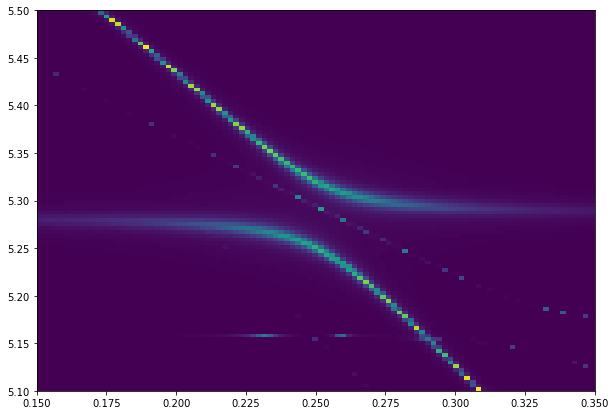

In [22]:
data = []
for row in CTTS.spec:
    new_row = []
    for state in row:
        new_row.append(expect(tensor(sigmam(), identity(3))))
    data.append(new_row)

pcolormesh(currs, freqs, np.abs(array(data)).T)
gcf().set_size_inches(10,7)

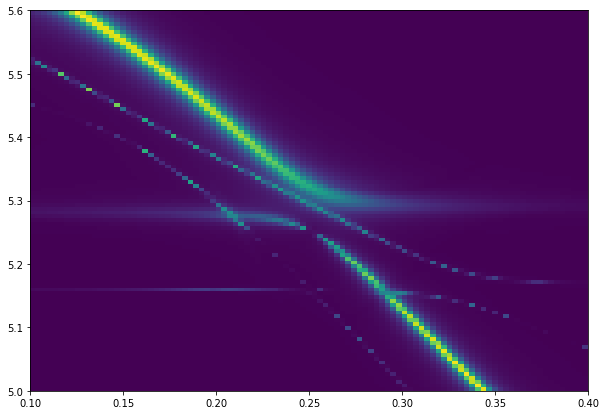

In [38]:
data = []
for row in CTTS.spec:
    new_row = []
    for state in row:
        new_row.append(state[3,3])
    data.append(new_row)

pcolormesh(currs, freqs, np.abs(array(data)).T)
gcf().set_size_inches(10,7)

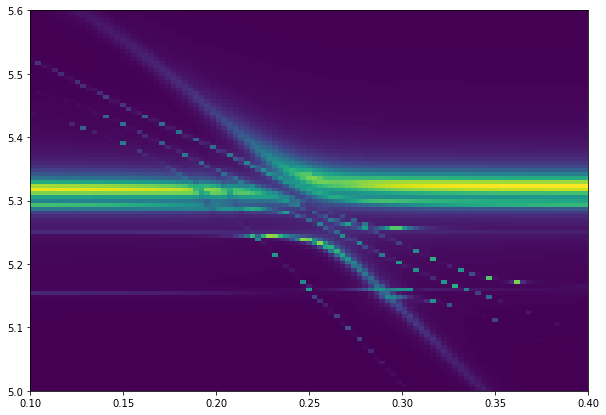

In [42]:
data = []
for row in CTTS.spec:
    new_row = []
    for state in row:
        new_row.append(state[3,3])
    data.append(new_row)

pcolormesh(currs, freqs, np.abs(array(data)).T)
gcf().set_size_inches(10,7)

In [80]:
transmon_states = [list(range(chain._transmon_truncation)) for i in range(chain._length)]
import itertools
list(itertools.product(*transmon_states))

[(0, 0, 0, 0, 0),
 (0, 0, 0, 0, 1),
 (0, 0, 0, 0, 2),
 (0, 0, 0, 0, 3),
 (0, 0, 0, 1, 0),
 (0, 0, 0, 1, 1),
 (0, 0, 0, 1, 2),
 (0, 0, 0, 1, 3),
 (0, 0, 0, 2, 0),
 (0, 0, 0, 2, 1),
 (0, 0, 0, 2, 2),
 (0, 0, 0, 2, 3),
 (0, 0, 0, 3, 0),
 (0, 0, 0, 3, 1),
 (0, 0, 0, 3, 2),
 (0, 0, 0, 3, 3),
 (0, 0, 1, 0, 0),
 (0, 0, 1, 0, 1),
 (0, 0, 1, 0, 2),
 (0, 0, 1, 0, 3),
 (0, 0, 1, 1, 0),
 (0, 0, 1, 1, 1),
 (0, 0, 1, 1, 2),
 (0, 0, 1, 1, 3),
 (0, 0, 1, 2, 0),
 (0, 0, 1, 2, 1),
 (0, 0, 1, 2, 2),
 (0, 0, 1, 2, 3),
 (0, 0, 1, 3, 0),
 (0, 0, 1, 3, 1),
 (0, 0, 1, 3, 2),
 (0, 0, 1, 3, 3),
 (0, 0, 2, 0, 0),
 (0, 0, 2, 0, 1),
 (0, 0, 2, 0, 2),
 (0, 0, 2, 0, 3),
 (0, 0, 2, 1, 0),
 (0, 0, 2, 1, 1),
 (0, 0, 2, 1, 2),
 (0, 0, 2, 1, 3),
 (0, 0, 2, 2, 0),
 (0, 0, 2, 2, 1),
 (0, 0, 2, 2, 2),
 (0, 0, 2, 2, 3),
 (0, 0, 2, 3, 0),
 (0, 0, 2, 3, 1),
 (0, 0, 2, 3, 2),
 (0, 0, 2, 3, 3),
 (0, 0, 3, 0, 0),
 (0, 0, 3, 0, 1),
 (0, 0, 3, 0, 2),
 (0, 0, 3, 0, 3),
 (0, 0, 3, 1, 0),
 (0, 0, 3, 1, 1),
 (0, 0, 3, 1, 2),
 (0, 0, 3,

In [83]:
chain._low_energy_states

[(0, 0, 0, 0, 0),
 (0, 0, 0, 0, 1),
 (0, 0, 0, 0, 2),
 (0, 0, 0, 0, 3),
 (0, 0, 0, 1, 0),
 (0, 0, 0, 1, 1),
 (0, 0, 0, 1, 2),
 (0, 0, 0, 1, 3),
 (0, 0, 0, 2, 0),
 (0, 0, 0, 2, 1),
 (0, 0, 0, 2, 2),
 (0, 0, 0, 3, 0),
 (0, 0, 0, 3, 1),
 (0, 0, 1, 0, 0),
 (0, 0, 1, 0, 1),
 (0, 0, 1, 0, 2),
 (0, 0, 1, 0, 3),
 (0, 0, 1, 1, 0),
 (0, 0, 1, 1, 1),
 (0, 0, 1, 1, 2),
 (0, 0, 1, 2, 0),
 (0, 0, 1, 2, 1),
 (0, 0, 1, 3, 0),
 (0, 0, 2, 0, 0),
 (0, 0, 2, 0, 1),
 (0, 0, 2, 0, 2),
 (0, 0, 2, 1, 0),
 (0, 0, 2, 1, 1),
 (0, 0, 2, 2, 0),
 (0, 0, 3, 0, 0),
 (0, 0, 3, 0, 1),
 (0, 0, 3, 1, 0),
 (0, 1, 0, 0, 0),
 (0, 1, 0, 0, 1),
 (0, 1, 0, 0, 2),
 (0, 1, 0, 0, 3),
 (0, 1, 0, 1, 0),
 (0, 1, 0, 1, 1),
 (0, 1, 0, 1, 2),
 (0, 1, 0, 2, 0),
 (0, 1, 0, 2, 1),
 (0, 1, 0, 3, 0),
 (0, 1, 1, 0, 0),
 (0, 1, 1, 0, 1),
 (0, 1, 1, 0, 2),
 (0, 1, 1, 1, 0),
 (0, 1, 1, 1, 1),
 (0, 1, 1, 2, 0),
 (0, 1, 2, 0, 0),
 (0, 1, 2, 0, 1),
 (0, 1, 2, 1, 0),
 (0, 1, 3, 0, 0),
 (0, 2, 0, 0, 0),
 (0, 2, 0, 0, 1),
 (0, 2, 0, 0, 2),
 (0, 2, 0,

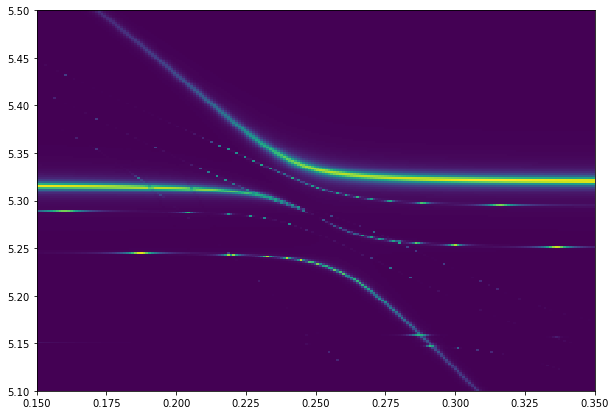

In [63]:
data = []
for row in CTTS.spec:
    new_row = []
    for state in row:
        new_row.append(state[3,3])
    data.append(new_row)

pcolormesh(currs, freqs, np.abs(array(data)).T)
gcf().set_size_inches(10,7)

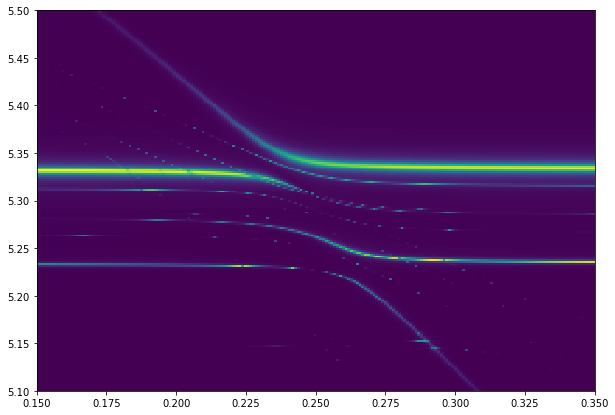

In [5]:
data = []
for row in CTTS.spec:
    new_row = []
    for state in row:
        new_row.append(state[3,3])
    data.append(new_row)

pcolormesh(currs, freqs, np.abs(array(data)).T)
gcf().set_size_inches(10,7)

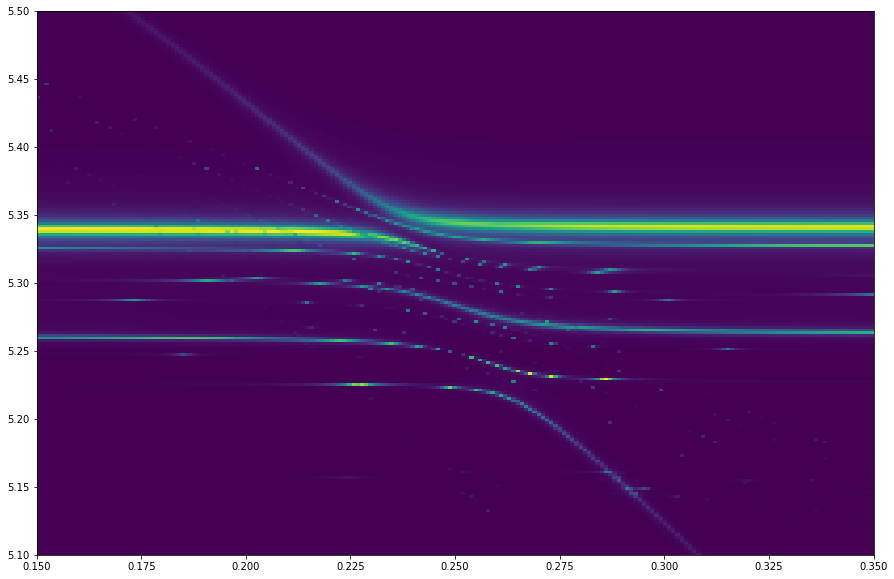

In [12]:
data = []
for row in CTTS.spec:
    new_row = []
    for state in row:
        new_row.append(state[3,3])
    data.append(new_row)

pcolormesh(currs, freqs, np.abs(array(data)).T)
gcf().set_size_inches(15,10)

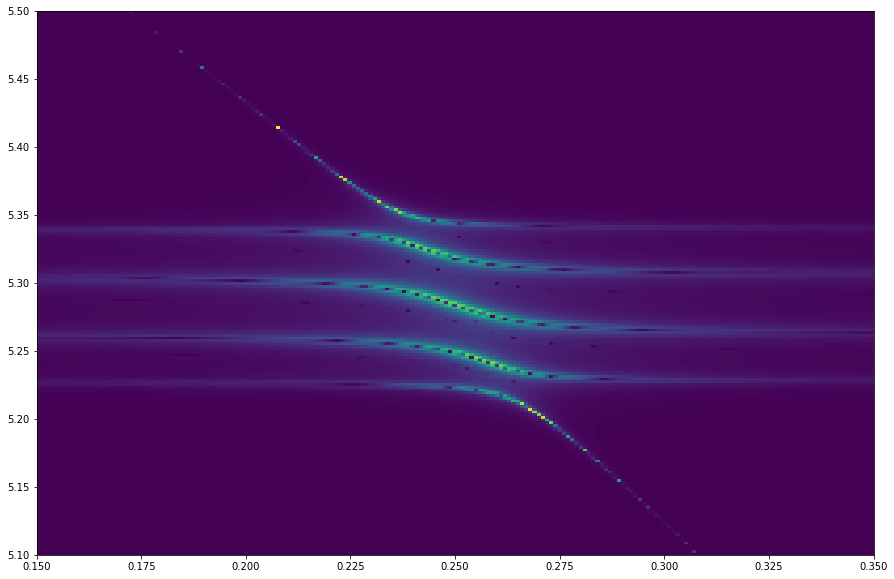

In [46]:
data = []
for row in CTTS.spec:
    new_row = []
    for state in row:
        new_row.append(expect(first_sm, state))
    data.append(new_row)

pcolormesh(currs, freqs, np.abs(array(data)).T)
gcf().set_size_inches(15,10)

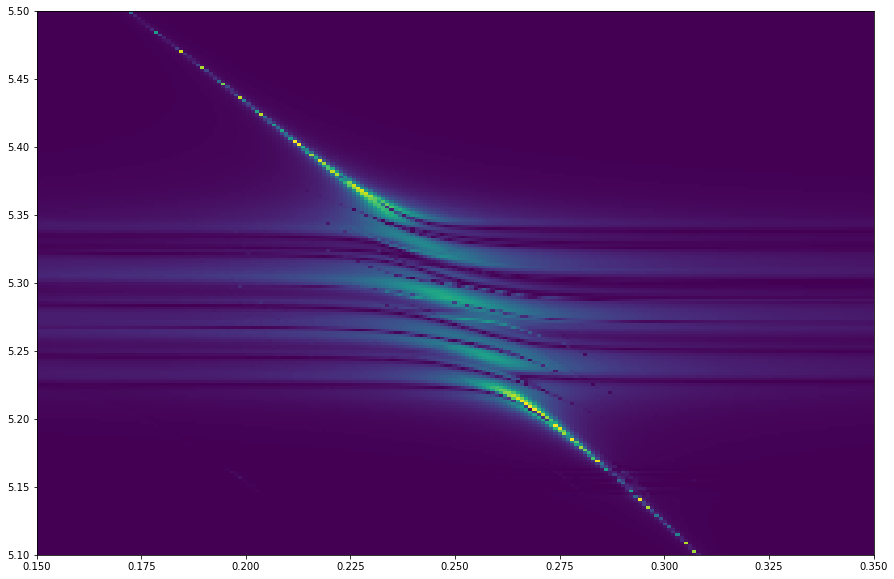

In [50]:
data = []
for row in CTTS.spec:
    new_row = []
    for state in row:
        new_row.append(expect(first_sm, state))
    data.append(new_row)

pcolormesh(currs, freqs, np.abs(array(data)).T)
gcf().set_size_inches(15,10)

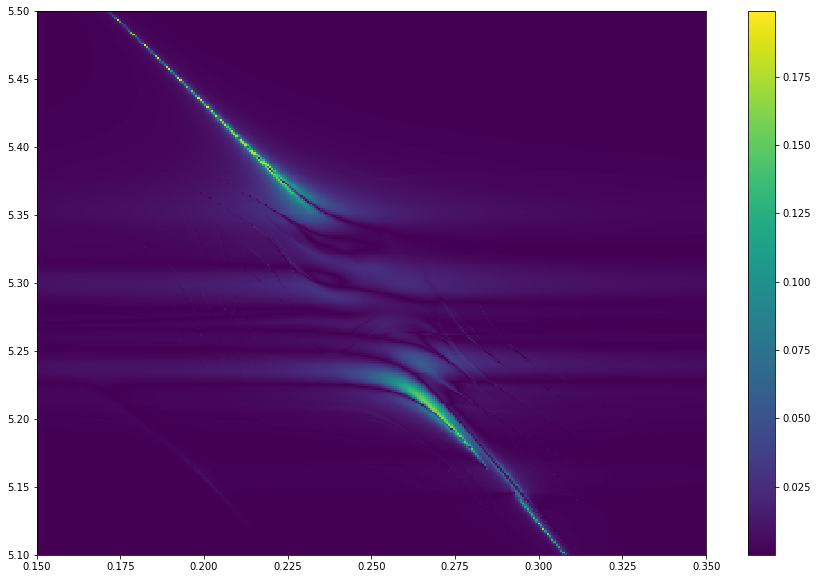

In [58]:
data = []
for row in CTTS.spec:
    new_row = []
    for state in row:
        new_row.append(expect(first_sm, state))
    data.append(new_row)

pcolormesh(currs, freqs, np.abs(array(data)).T)
gcf().set_size_inches(15,10)
colorbar()

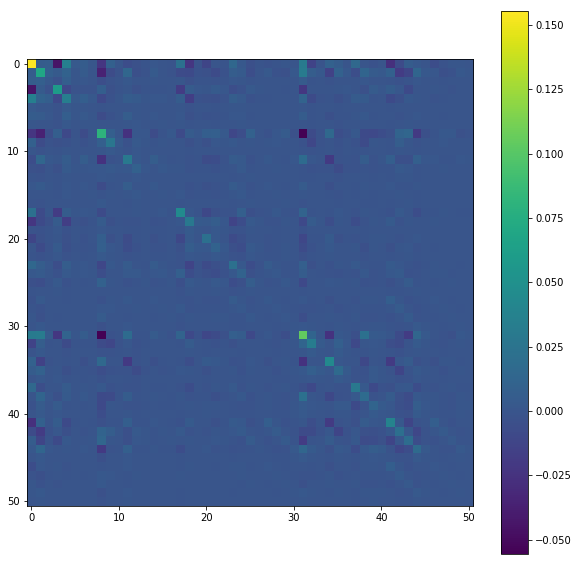

In [123]:
imshow(real(CTTS.spec[250][125].full()))
gcf().set_size_inches(10,10)
colorbar()

In [32]:
import pickle

In [33]:
pwd

'/home/gleb/Projects/Examples/transmon-simulations'

In [35]:
with open("huge_sim_5_excitations.pkl", "wb") as f:
    pickle.dump((chain, CTTS, Omega_2s, freqs), f)

In [8]:
CTTS._solver_error_coords

[]

In [20]:
chain_op = chain._identity_array.copy()
chain_op[0] = chain._transmons[0].lowering(0)
first_sm = chain.truncate_to_low_population_subspace(tensor(*chain_op))

chain_op = chain._identity_array.copy()
chain_op[2] = chain._transmons[2].lowering(0)*chain._transmons[2].raising(0)
third_sz = chain.truncate_to_low_population_subspace(tensor(*chain_op))

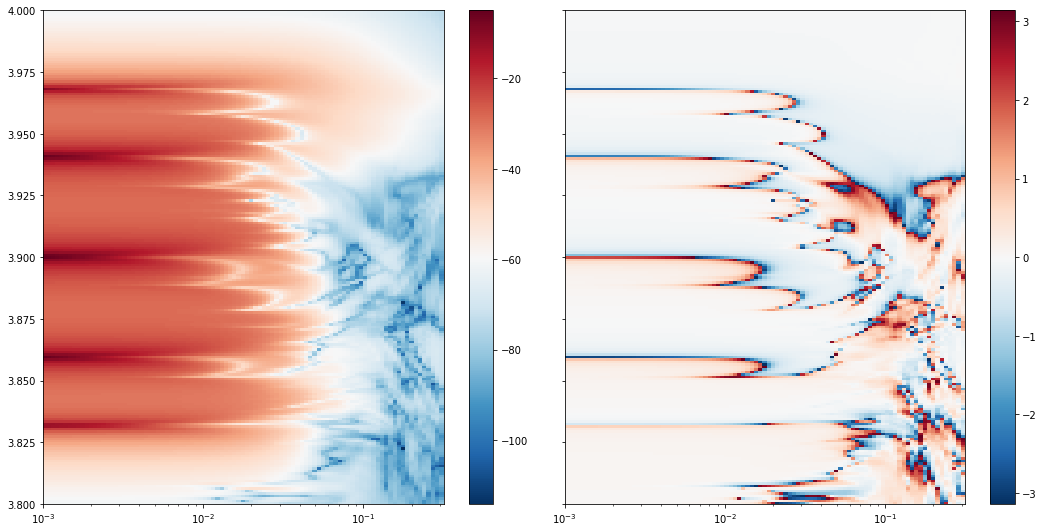

In [26]:
data = []
for idx1, row in enumerate(CTTS.spec):
    new_row = []
    for idx2, state in enumerate(row):
        new_row.append((sqrt(chain._gamma_rel[0])*expect(first_sm, state)/(Omega_2s[idx1]/2/sqrt(chain._gamma_rel[-1])))**2)
    data.append(new_row)

    
fig, axes = subplots(1,2, figsize=(15,7.5), sharey=True, sharex=True)
m1 = axes[0].pcolormesh(Omega_2s/2/pi, freqs,10*log10(np.abs(array(data)).T), cmap="RdBu_r")
m2 = axes[1].pcolormesh(Omega_2s/2/pi, freqs, np.angle(array(data)).T, cmap="RdBu_r")
plot(Omega_2s)
xscale("log")
colorbar(m1, ax=axes[0])
colorbar(m2, ax=axes[1])
tight_layout()

/home/gleb/pymkl/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


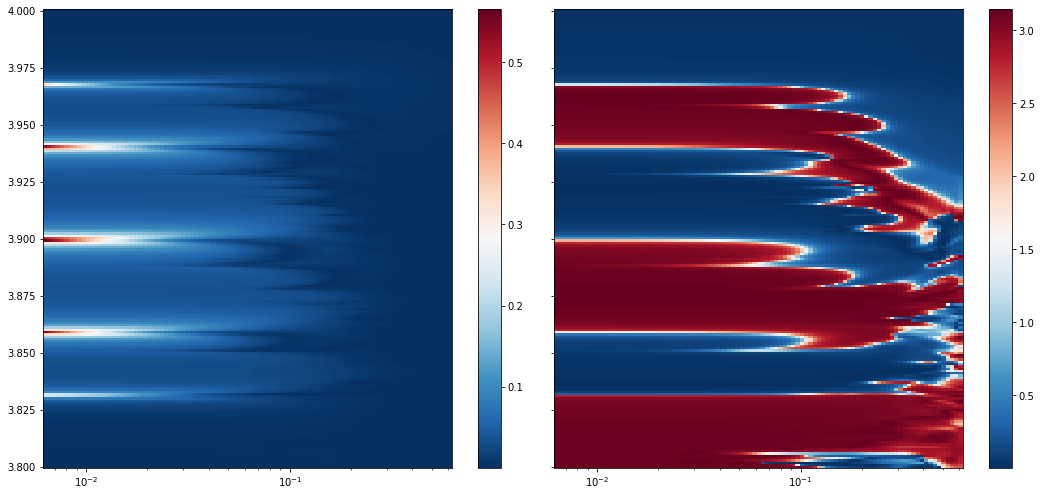

In [30]:
data = []
for idx1, row in tqdm_notebook(enumerate(CTTS.spec)):
    new_row = []
    for idx2, state in enumerate(row):
        new_row.append((sqrt(chain._gamma_rel[0])*expect(first_sm, state)/(Omega_2s[idx1]/2/sqrt(chain._gamma_rel[-1]))))
    data.append(new_row)

    
fig, axes = subplots(1,2, figsize=(15,7), sharey=True, sharex=True)

step_x = Omega_2s[1]-Omega_2s[0]
X = concatenate((Omega_2s-step_x/2, [Omega_2s[-1]+step_x/2]))

step_y = freqs[1]-freqs[0]
Y = concatenate((freqs-step_y/2, [freqs[-1]+step_y/2]))

m1 = axes[0].pcolormesh(X, Y, (np.abs(array(data)).T), cmap="RdBu_r")
m2 = axes[1].pcolormesh(X, Y, abs(np.angle(array(data)).T), cmap="RdBu_r")
errors = array(CTTS._solver_error_coords)

# axes[0].plot(Omega_2s[errors[:,0]], freqs[errors[:,1]], ls="", marker="o", markerfacecolor="none", markersize=10)

xscale("log")
colorbar(m1, ax=axes[0])
colorbar(m2, ax=axes[1])
tight_layout()

/home/gleb/pymkl/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


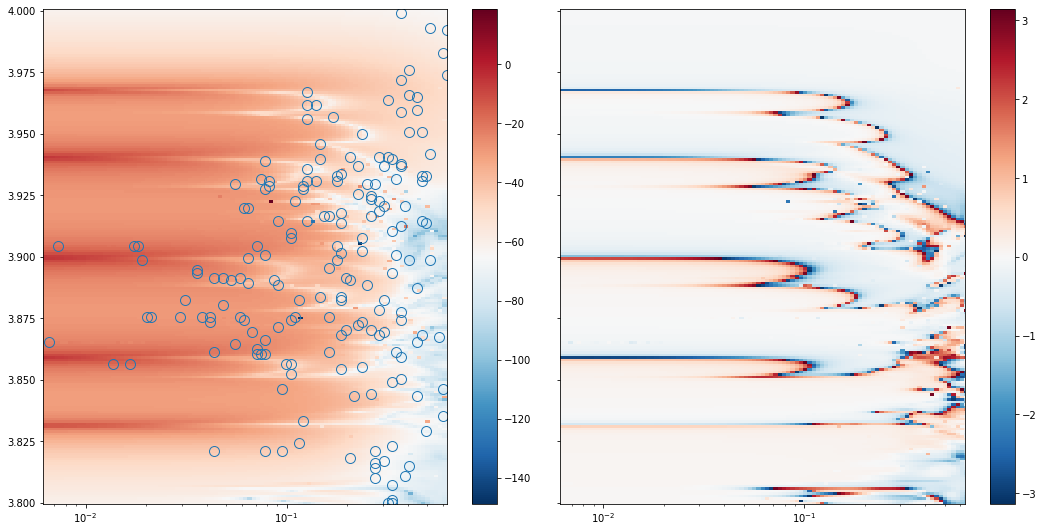

In [17]:
data = []
for idx1, row in tqdm_notebook(enumerate(CTTS.spec)):
    new_row = []
    for idx2, state in enumerate(row):
        new_row.append((sqrt(chain._gamma_rel[0])*expect(first_sm, state)/(Omega_2s[idx1]/2/sqrt(chain._gamma_rel[-1])))**2)
    data.append(new_row)

    
fig, axes = subplots(1,2, figsize=(15,7.5), sharey=True, sharex=True)

step_x = Omega_2s[1]-Omega_2s[0]
X = concatenate((Omega_2s-step_x/2, [Omega_2s[-1]+step_x/2]))

step_y = freqs[1]-freqs[0]
Y = concatenate((freqs-step_y/2, [freqs[-1]+step_y/2]))

m1 = axes[0].pcolormesh(X, Y, 10*log10(np.abs(array(data)).T), cmap="RdBu_r")
m2 = axes[1].pcolormesh(X, Y, np.angle(array(data)).T, cmap="RdBu_r")
errors = array(CTTS._solver_error_coords)

axes[0].plot(Omega_2s[errors[:,0]], freqs[errors[:,1]], ls="", marker="o", markerfacecolor="none", markersize=10)

xscale("log")
colorbar(m1, ax=axes[0])
colorbar(m2, ax=axes[1])
tight_layout()

In [25]:
CTTS.spec

AttributeError: 'ChainTwoToneSimulation' object has no attribute 'spec'

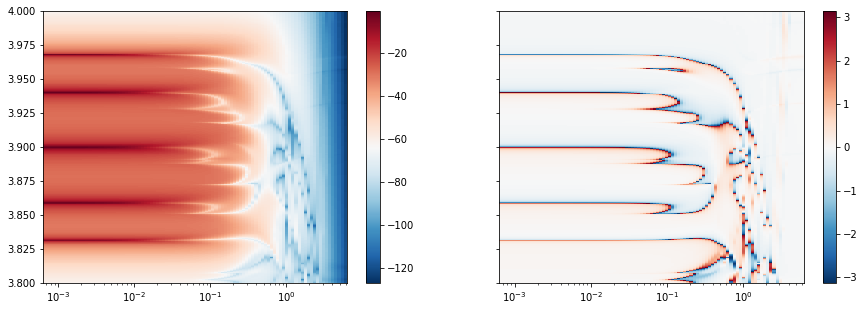

In [8]:

data = []
for idx1, row in enumerate(CTTS.spec):
    new_row = []
    for idx2, state in enumerate(row):
        new_row.append((sqrt(chain._gamma_rel[0])*expect(first_sm, state)/(Omega_2s[idx1]/2/sqrt(chain._gamma_rel[-1])))**2)
    data.append(new_row)

    
fig, axes = subplots(1,2, figsize=(15,5), sharey=True, sharex=True)
m1 = axes[0].pcolormesh(Omega_2s, freqs, 10*log10(np.abs(array(data)).T), cmap="RdBu_r")
m2 = axes[1].pcolormesh(Omega_2s, freqs, np.angle(array(data)).T, cmap="RdBu_r")

xscale("log")
colorbar(m1, ax=axes[0])
colorbar(m2, ax=axes[1])

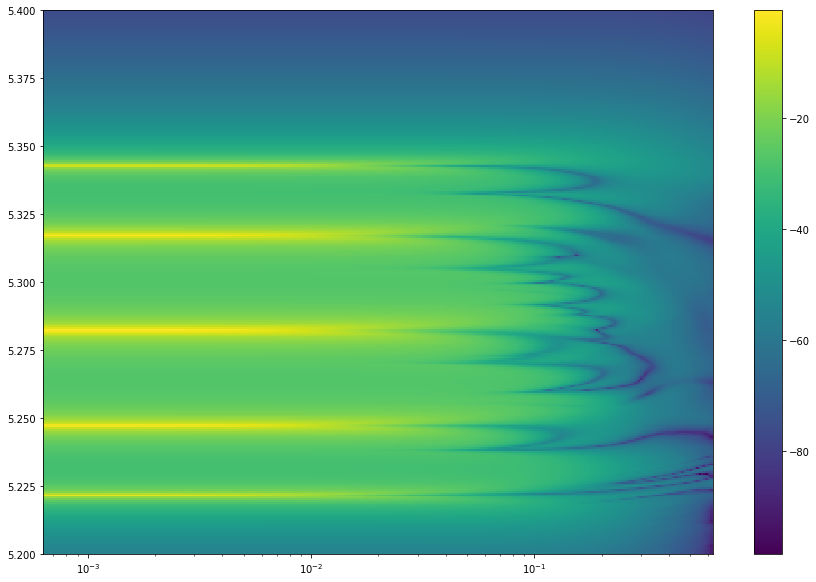

In [112]:
data = []
for idx1, row in enumerate(CTTS.spec):
    new_row = []
    for idx2, state in enumerate(row):
        new_row.append((sqrt(chain._gamma_rel[0])*expect(first_sm, state)/(Omega_2s[idx1]/2/sqrt(chain._gamma_rel[-1])))**2)
    data.append(new_row)

pcolormesh(Omega_2s, freqs, 10*log10(np.abs(array(data)).T))
xscale("log")
colorbar()
gcf().set_size_inches(15,10)

Quantum object: dims = [[51], [51]], shape = (51, 51), type = oper, isherm = True
Qobj data =
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.91422632 0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]

 299258

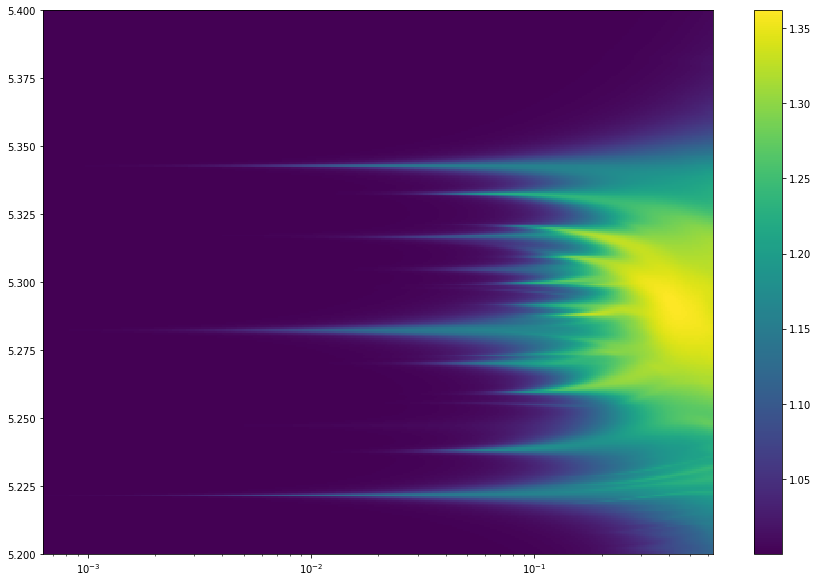

In [131]:
data = []
for idx1, row in enumerate(CTTS.spec):
    new_row = []
    print("\r", idx1, end="")
    for idx2, state in enumerate(row):
        new_row.append(expect(third_sz, state))
    data.append(new_row)

pcolormesh(Omega_2s, freqs, np.abs(array(data)).T)
xscale("log")
colorbar()
gcf().set_size_inches(15,10)

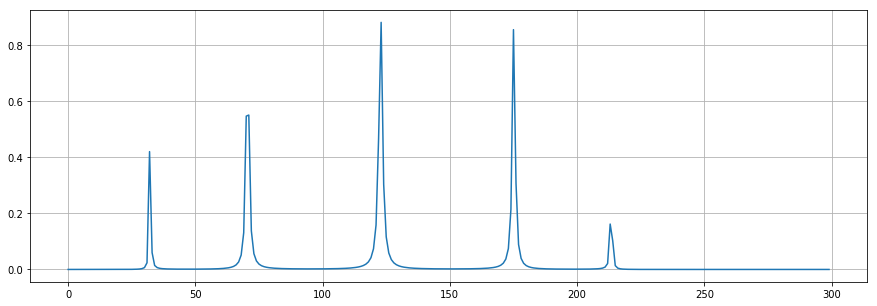

In [120]:
plot(abs(array(data)[0]))
grid()
gcf().set_size_inches(15,5)
# xlim(100, 150)

In [15]:
(list(enumerate(chain._low_energy_states)))

[(0, (0, 0, 0, 0, 0)),
 (1, (0, 0, 0, 0, 1)),
 (2, (0, 0, 0, 0, 2)),
 (3, (0, 0, 0, 1, 0)),
 (4, (0, 0, 0, 1, 1)),
 (5, (0, 0, 0, 1, 2)),
 (6, (0, 0, 0, 2, 0)),
 (7, (0, 0, 0, 2, 1)),
 (8, (0, 0, 0, 2, 2)),
 (9, (0, 0, 1, 0, 0)),
 (10, (0, 0, 1, 0, 1)),
 (11, (0, 0, 1, 0, 2)),
 (12, (0, 0, 1, 1, 0)),
 (13, (0, 0, 1, 1, 1)),
 (14, (0, 0, 1, 1, 2)),
 (15, (0, 0, 1, 2, 0)),
 (16, (0, 0, 1, 2, 1)),
 (17, (0, 0, 2, 0, 0)),
 (18, (0, 0, 2, 0, 1)),
 (19, (0, 0, 2, 0, 2)),
 (20, (0, 0, 2, 1, 0)),
 (21, (0, 0, 2, 1, 1)),
 (22, (0, 0, 2, 2, 0)),
 (23, (0, 1, 0, 0, 0)),
 (24, (0, 1, 0, 0, 1)),
 (25, (0, 1, 0, 0, 2)),
 (26, (0, 1, 0, 1, 0)),
 (27, (0, 1, 0, 1, 1)),
 (28, (0, 1, 0, 1, 2)),
 (29, (0, 1, 0, 2, 0)),
 (30, (0, 1, 0, 2, 1)),
 (31, (0, 1, 1, 0, 0)),
 (32, (0, 1, 1, 0, 1)),
 (33, (0, 1, 1, 0, 2)),
 (34, (0, 1, 1, 1, 0)),
 (35, (0, 1, 1, 1, 1)),
 (36, (0, 1, 1, 2, 0)),
 (37, (0, 1, 2, 0, 0)),
 (38, (0, 1, 2, 0, 1)),
 (39, (0, 1, 2, 1, 0)),
 (40, (0, 2, 0, 0, 0)),
 (41, (0, 2, 0, 0, 1)),
 (

In [23]:
data = []
state_id = 14
for idx1, row in enumerate(CTTS.spec):
    new_row = []
    for idx2, state in enumerate(row):
        new_row.append(state[state_id, state_id])
    data.append(new_row)
print(chain._low_energy_states[state_id])

(0, 0, 1, 1, 2)


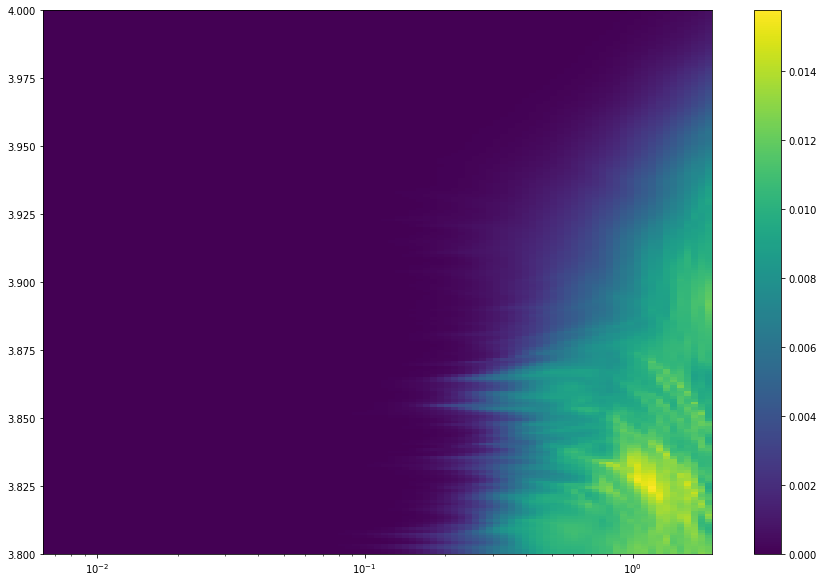

In [25]:
pcolormesh(Omega_2s, freqs, (np.abs(array(data))).T)
xscale("log")
colorbar()
gcf().set_size_inches(15,10)

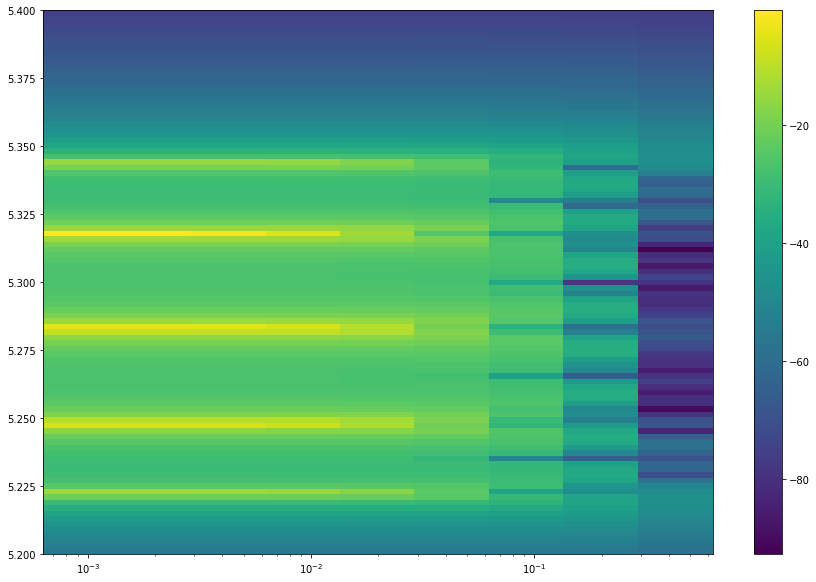

In [16]:
data = []
for idx1, row in enumerate(CTTS.spec):
    new_row = []
    for idx2, state in enumerate(row):
        new_row.append((sqrt(chain._gamma_rel[0])*expect(first_sm, state)/(Omega_2s[idx1]/2/sqrt(chain._gamma_rel[-1])))**2)
    data.append(new_row)

pcolormesh(Omega_2s, freqs, 10*log10(np.abs(array(data)).T))
xscale("log")
colorbar()
gcf().set_size_inches(15,10)

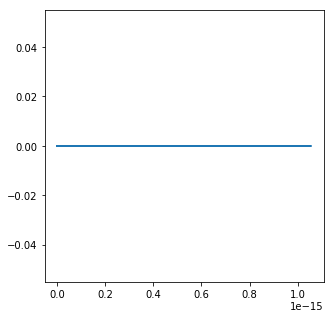

In [81]:
plot(np.real(data[0]), np.imag(data[0]))
# xlim(200,600)
gcf().set_size_inches(5,5)